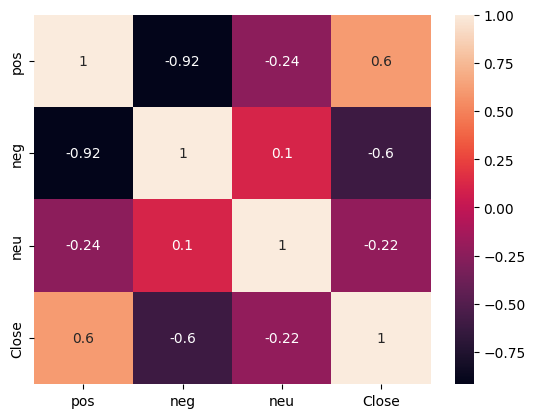

In [38]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

data = pd.read_csv('predict_model_raw_data.csv')


data[['pos','neg','neu']] = data[['pos','neg','neu']].pct_change()
# data['neg'] = data['neg'].diff()
# data['neu'] = data['neu'].diff()

data['label'] = data['Close'].diff()
data = data[data['label'].notna()]
data['label'] = data['label'].map(lambda x: 1 if x > 0 else 0)
# lag 一天
# data[['pos','neg','neu']] = data[['pos','neg','neu']].shift(1)

data['Close'] = data['Close'].pct_change()


start = '2020-01-01'
end = '2023-05-31'
data['date'] = pd.to_datetime(data['date'])
data = data[(data['date']>= pd.Timestamp(start)) & (data['date'] <= pd.Timestamp(end))]
# print(data)
# data.to_csv('predict_model_train_data.csv',index=False)

sn.heatmap(data[['pos','neg','neu','Close']].corr(), annot=True)
plt.show()


# 相关性分析

In [25]:
from sklearn.preprocessing import MinMaxScaler

sentiment = data[['date', 'pos', 'neg', 'neu']]
price = data[['date', 'Close']]


scaler = MinMaxScaler()
# 指标计算
sentiment['metrics'] = sentiment['pos'] - sentiment['neg']
# 归一化
sentiment[['metrics']]= scaler.fit_transform(sentiment[['metrics']])
# 滑动窗口
window_size = 1 # 窗口大小
sentiment['metrics'] = sentiment['metrics'].rolling(window_size).mean()


sentiment['metrics_return'] = sentiment['metrics'].pct_change()

price['Close'] = scaler.fit_transform(price[['Close']])
price['Close_return'] = price['Close'].pct_change()

C:\Users\67093\AppData\Local\Temp\ipykernel_15684\2068821296.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sentiment['metrics'] = sentiment['pos'] - sentiment['neg']
C:\Users\67093\AppData\Local\Temp\ipykernel_15684\2068821296.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sentiment[['metrics']]= scaler.fit_transform(sentiment[['metrics']])
C:\Users\67093\AppData\Local\Temp\ipykernel_15684\2068821296.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFram

In [26]:
join = pd.merge(sentiment,price,left_on='date',right_on='date')
start = '2020-01-01'
end = '2023-05-31'
join['date'] = pd.to_datetime(join['date'])
join = join[(join['date']>= pd.Timestamp(start)) & (join['date'] <= pd.Timestamp(end))]

count = 0
for id,row in join.iterrows():
    if row['metrics_return'] * row['Close_return'] > 0:
        count = count + 1
print(count/len(join))



print(join['metrics_return'].corr(join['Close_return']))
print(join['metrics'].corr(join['Close']))

0.7449879711307137
nan
0.06774567082043742


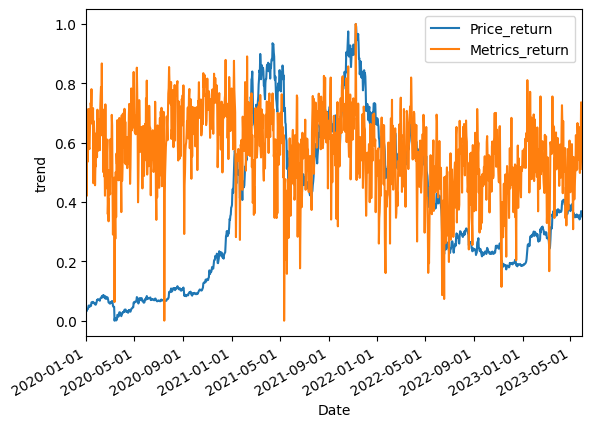

In [27]:


# plt.figure(figsize=(60, 20))
plt.plot(join['date'], join['Close'],label='Price_return')
plt.plot(join['date'], join['metrics'],label='Metrics_return')
# plt.plot(sen_dates, trend,label='Sentiment_return')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gcf().autofmt_xdate()
plt.xlabel('Date')
plt.ylabel('trend')
# plt.title(start+'~'+end)
# plt.ylim(-0.2,0.2)
plt.xlim(pd.Timestamp(start), pd.Timestamp(end))

plt.legend()
plt.show()